# Ames Housing Sale Predictions - Model Tuning

## Contents:
- [Imports & Data](#Imports-\&-Data)
- [Train-Test-Split](#Train-Test-Split)
- [Scale Model](#Scale-Model)
- [Fit and Asses Models](#Fit-and-Asses-Models)
    - [Linear Regression (OLS)](#Linear-Regression-(OLS))
    - [Ridge Model](#Ridge-Model)
    - [LASSO Model](#LASSO-Model)
- [Predictions & Review](#Predictions-\&-Review)

## Imports & Data

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

#### Read In Data

In [2]:
# define paths
path_production_data = '../datasets/03_production/'

In [3]:
# Read in data
df_train = pd.read_csv(f'{path_production_data}train_production.csv')

## Train-Test-Split
- Use a Train-Test-Split of:
    - Train: 80% (1638 entries)
    - Test: 20% (410 entries)

In [4]:
# Train Test Split - Define X & y
X = df_train.drop(columns='SalePrice')
y = df_train['SalePrice']

In [5]:
# Train Test Split (80%/20% based on sample size)
# Train - 1638 entries
# Test - 410 entries
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale Model
- Scale the model to prepare for Ridge and LASSO models

In [6]:
# Scale model
sc = StandardScaler()

In [7]:
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [8]:
# Review scaled means (train to be ~0)
print(f'Train mean sum: {Z_train.mean(axis=0).sum().round(4)}')
print(f'Test mean sum: {Z_test.mean(axis=0).sum().round(4)}')

Train mean sum: -0.0
Test mean sum: 1.1014


## Fit and Asses Models

### Linear Regression (OLS)

In [9]:
# Instantiate Model
ols = LinearRegression()

In [10]:
# Fit model
ols.fit(Z_train, y_train);

### Ridge Model

In [11]:
# Create a list of ridge alphas to test
r_alphas = np.logspace(1, 2, 500)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=10)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train);

In [12]:
# Optimal value of alpha
ridge_cv.alpha_

15.078450458610519

### LASSO Model

In [13]:
# Create a list of LASSO alphas to test
l_alphas = np.logspace(1, 2, 500)

# Cross-validate over our list of LASSO alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=5000)

# Fit model using best LASSO alpha!
lasso_cv.fit(Z_train, y_train);

In [14]:
# Optimal value of alpha
lasso_cv.alpha_

42.19398080805026

## Predictions & Review
- Make predictions and review R$^2$ and MSE

In [15]:
y_preds_ols = ols.predict(Z_test)
mse_ols = metrics.mean_squared_error(y_test, y_preds_ols)
resids_ols = y_test - y_preds_ols

In [16]:
y_preds_ridge = lasso_cv.predict(Z_test)
mse_ridge = metrics.mean_squared_error(y_test, y_preds_ridge)
resids_ridge = y_test - y_preds_ridge

In [17]:
y_preds_lasso = ridge_cv.predict(Z_test)
mse_lasso = metrics.mean_squared_error(y_test, y_preds_lasso)
resids_lasso = y_test - y_preds_lasso

In [18]:
# Baseline
baseline = 1 - y_test.mean() # baseline
print(f'Baseline error mean: {round(baseline)}')
print(f'OLS error mean: {round(resids_ols.mean())}')
print(f'Ridge error mean: {round(resids_ridge.mean())}')
print(f'LASSO error mean: {round(resids_lasso.mean())}')

Baseline error mean: -181400
OLS error mean: -213
Ridge error mean: -380
LASSO error mean: -107


#### Compare with Baseline
According to the results in the previous cell, all models perform significantly better than the baseline.

### Plot Residuals

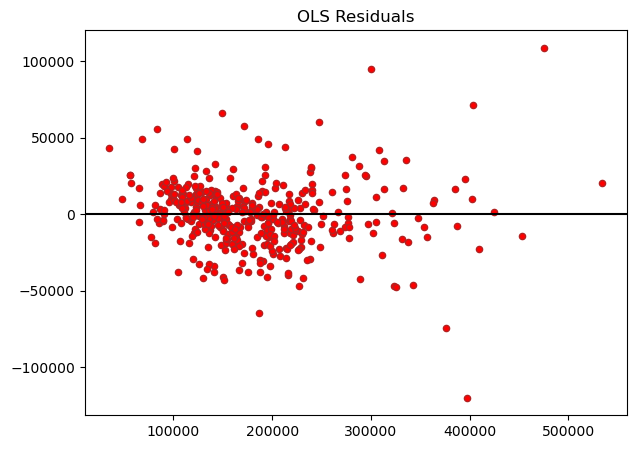

In [19]:
# Scatter plot of OLS residuals
plt.figure(figsize=(7,5))
plt.scatter(y_preds_ols, resids_ols, color = 'red', edgecolors='firebrick', s=20)
plt.axhline(0, color = 'black');


# Labels
plt.title('OLS Residuals');

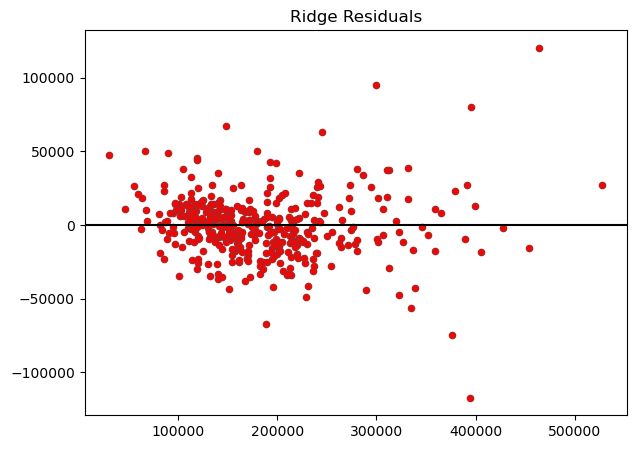

In [20]:
# Scatter plot of Ridge residuals
plt.figure(figsize=(7,5))
plt.scatter(y_preds_ridge, resids_ridge, color = 'red', edgecolors='firebrick', s=20)
plt.axhline(0, color = 'black');

# Labels
plt.title('Ridge Residuals');

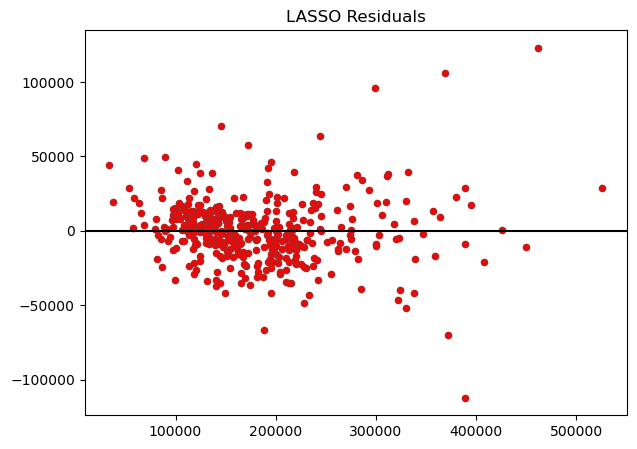

In [21]:
# Scatter plot of LASSO residuals
plt.figure(figsize=(7,5))
plt.scatter(y_preds_lasso, resids_lasso, color = 'red', edgecolors='firebrick', s=20)
plt.axhline(0, color = 'black');

# Labels
plt.title('LASSO Residuals');

All three residual plots demonstrate a random pattern, which supports the assumption of linear model. Additionally, the residual plots demonstrate homoscedasticity as the variance remains consistent across all prediction values.

### Metrics
- Print R$^2$s and MSE

In [22]:
# Print R2 & MSE
# OLS
print(" OLS ".center(20, "-"))
print(f'Training R2: {ols.score(Z_train,y_train).round(5)}')
print(f'Testing R2:  {ols.score(Z_test,y_test).round(5)}')
print(f'Mean R2:     {np.mean([ols.score(Z_train,y_train), ols.score(Z_test,y_test)]).round(5)}')
print(f'MSE:         {mse_ols.round()}')

# Ridge
print()
print(" Ridge ".center(20, "-"))
print(f'Training R2: {ridge_cv.score(Z_train,y_train).round(5)}')
print(f'Testing R2:  {ridge_cv.score(Z_test,y_test).round(5)}')
print(f'Mean R2:     {np.mean([ridge_cv.score(Z_train,y_train), ridge_cv.score(Z_test,y_test)]).round(5)}')
print(f'MSE:         {mse_ridge.round()}')

# LASSO
print()
print(" LASSO ".center(20, "-"))
print(f'Training R2: {lasso_cv.score(Z_train,y_train).round(5)}')
print(f'Testing R2:  {lasso_cv.score(Z_test,y_test).round(5)}')
print(f'Mean R2:     {np.mean([lasso_cv.score(Z_train,y_train), lasso_cv.score(Z_test,y_test)]).round(5)}')
print(f'MSE:         {mse_lasso.round()}')

------- OLS --------
Training R2: 0.95148
Testing R2:  0.9195
Mean R2:     0.93549
MSE:         468073764.0

------ Ridge -------
Training R2: 0.94911
Testing R2:  0.91811
Mean R2:     0.93361
MSE:         461957988.0

------ LASSO -------
Training R2: 0.94947
Testing R2:  0.92055
Mean R2:     0.93501
MSE:         476113911.0
